In [30]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

pip install opencv-python

In [31]:
def MSE(original, compressed):
    return np.mean((original - compressed) ** 2)


def PSNR(original, compressed):
    mse = MSE(original, compressed)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    return 20 * math.log10(max_pixel / math.sqrt(mse))


In [32]:
def show(in_path, out_path, K):
    in_img = cv2.imread(in_path)
    Z = in_img.reshape((-1, 3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(
        Z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    out_img = res.reshape((in_img.shape))

    fg, ax = plt.subplots(1, 2, figsize=(8, 4))
    for i, image in enumerate([in_img, out_img]):
        ax[i].imshow(image)
        if i == 0:
            ax[i].set_title('Origin Image')
        else:
            ax[i].set_title('k-Mean clustering Image')

    cv2.imwrite(out_path, out_img)

    print(f"MSE = {MSE(in_img, out_img)}")
    print(f"PSNR = {PSNR(in_img, out_img)} db")


MSE = 78.23759725720683
PSNR = 29.19664856434476 db


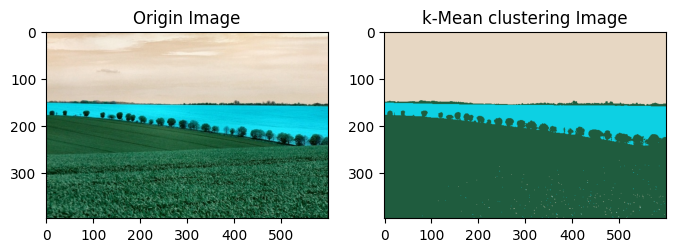

In [33]:
show('img/in1.jpg', 'img/out1.jpg', 3)

MSE = 74.26594577407793
PSNR = 29.422906447213325 db


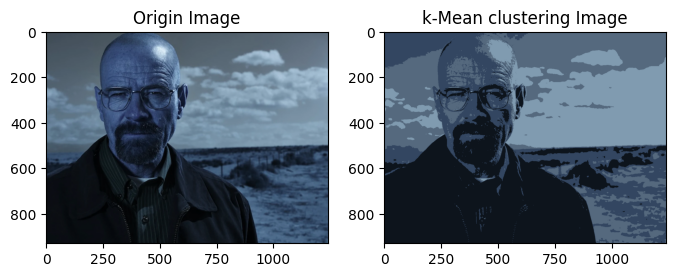

In [34]:
show('img/in2.webp', 'img/out2.jpg', 4)

MSE = 78.25282885729331
PSNR = 29.195803145228297 db


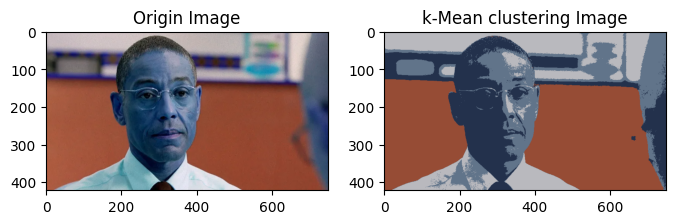

In [35]:
show('img/in3.webp', 'img/out3.jpg', 4)
